In [304]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [440]:
def pk_combine_dose_reigment(dose_iv= 500,
                             infusion_duration = 24,
                             dose_im = 1300,
                             start_im = 24,
                             interval_dose_im = [0, 24, 48,72,96,120],
                             CL = 7.5,
                             Vd = 33,
                             ke= 0.228,
                             ka = 0.028,
                             F=1,
                             time_range = 170,
                             IM_profile = False,
                             IV_profile = False,
                             combine_profile=True):  
    """ PK Simulation of Combined Dosing Regimen IV and IM/Oral Drugs
   
    This function helps to visualize the PK profile of the combined dosing regimen between:
    - Prolonged infusion iv drugs: characterized by dose_iv and the infusion duration
    - IM or oral drugs: charaterized by dose_im, start_im, and interval_dose_im
   
    Besides, the function also takes into account the PK parameters of the drugs, including CL, Vd, ke, ka, and F.
    The time range of the simulation can be selected through time_range.
    
    Arguments: 
    dose_iv (mg) __ float: Dose of iv drug 
    infusion_duration (h) __ int: time that needs to complete the infusion
    dose_im (mg) __ float: Dose of im drug
    start_im (h) __ int: Time point that starts to inject the im or oral drug
    interval_dose_im (h) __ list of int: relative time points that the im drug is injected, started from 0
    CL (L/h) __ float: Clearance 
    Vd (L) __ float: Volume of distribution
    ke (h-1) __ float: elimination constant
    ka (h-1) __ float: absorption constant
    F __ float: bioavailability, range from 0 to 1
    time_range (h) __ int: The final time point that is simulated
    IM_profile __ boolean: Choose to display IM profile or not
    IV_profile __ boolean: Choose to display IV profile or not
    combine_profile __ boolean: Choose to display the combined profile or not
    """ 
    
 




    # Calculation for iv drug profile only:
    ko = dose_iv/infusion_duration
    dose_im_F =  dose_im*F

    time_points_mutual = np.arange(0, time_range, 1)
    time_point_infusion = time_points_mutual[0:(round(infusion_duration)+1)] # Timepoint from 0 to finishing infusion
    time_point_elim = time_points_mutual[(round(infusion_duration)+1):] # Timepoint from finishing infusio to the end of the time scale

    C_infusion = (ko / CL) * (1 - np.exp(-ke * time_point_infusion)) # Concentration on the infusion side
    C_elim = C_infusion[-1] * np.exp(-ke * (time_point_elim - time_point_infusion[-1])) # Concentration on the elimination side
    
    global concentrations_iv
    concentrations_iv = np.concatenate((C_infusion, C_elim)) # Combine two concentration to have the whole iv profile


    # Calculation for im drug profile only:
    time_points_im = time_points_mutual[start_im:]-start_im
    concentration_im = np.zeros(len(time_points_im)) # Initialize an array for concentration of im drug.

    
    for dose_time in interval_dose_im:
        for i, t in enumerate(time_points_im):
            if t >= dose_time:
                concentration_im[i] += (dose_im_F / Vd) * (ka / (ka - ke)) * (np.exp(-ke * (t - dose_time)) - np.exp(-ka * (t - dose_time)))

    
    concentrations_im = np.concatenate((np.zeros(start_im), concentration_im)) # Add the 0 concentration for time point before injection of im drug


    # Calculation for the combine profile:
    final_concentration = concentrations_iv + concentrations_im

    
    # Visualization of profiles
    fig, ax = plt.subplots(figsize=(12,6))
    if IM_profile:
        sns.lineplot(x=time_points_mutual, y=concentrations_im, ax=ax, label = 'IM')
    if IV_profile:
        sns.lineplot(x=time_points_mutual, y=concentrations_iv, ax=ax, label = 'IV')
    if combine_profile:
        sns.lineplot(x=time_points_mutual, y=final_concentration, ax=ax, label = 'Superimposition')
    
    ax.set_xlabel('Time')
    ax.set_ylabel('Concentration (mg/L)')
    plt.title('PK profile')
    plt.show()

/Users/lod/miniconda3/envs/MLcode/lib/python3.12/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/lod/miniconda3/envs/MLcode/lib/python3.12/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/lod/miniconda3/envs/MLcode/lib/python3.12/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/lod/miniconda3/envs/MLcode/lib/python3.12/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and

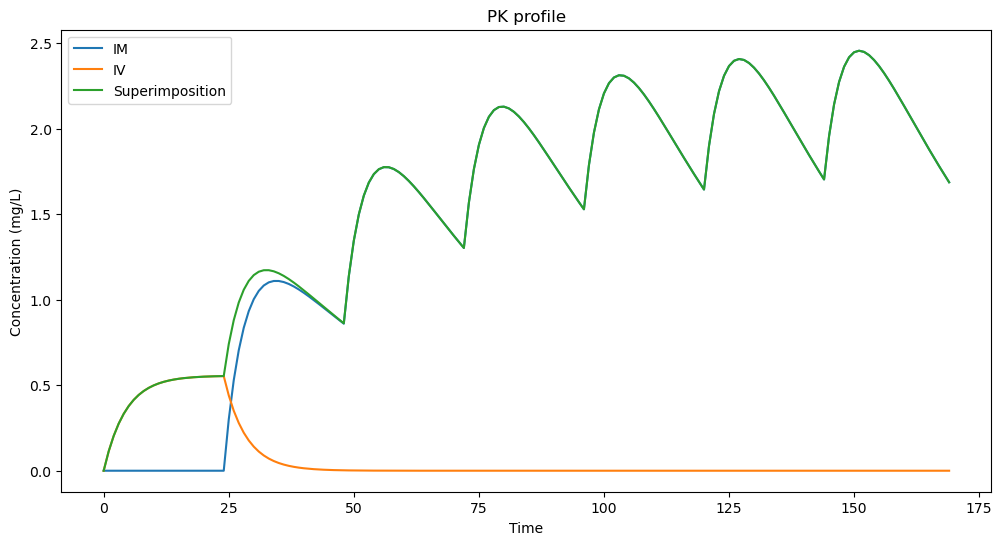

In [441]:
pk_combine_dose_reigment(dose_im=400,dose_iv=100,IM_profile=True,IV_profile=True)